In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df_path = '/content/Placement_Data_Full_Class.csv'
df = pd.read_csv(df_path)

In [3]:
print(df)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR 

In [4]:
columns_with_nan = df.columns[df.isnull().any()]
print(columns_with_nan)

Index(['salary'], dtype='object')


Statistical Tests

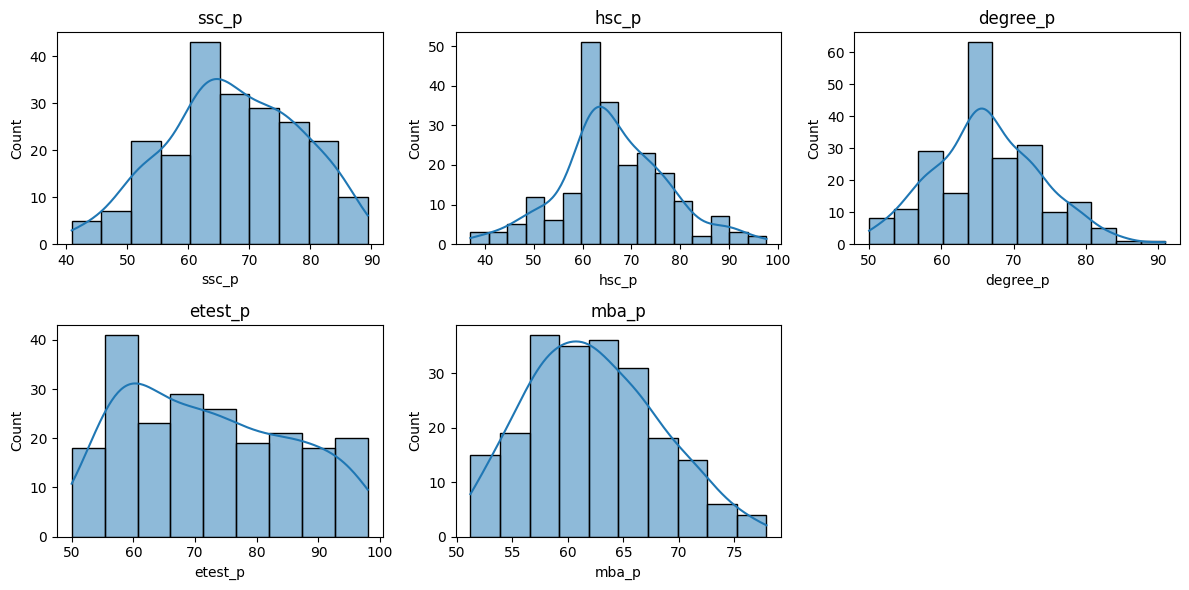

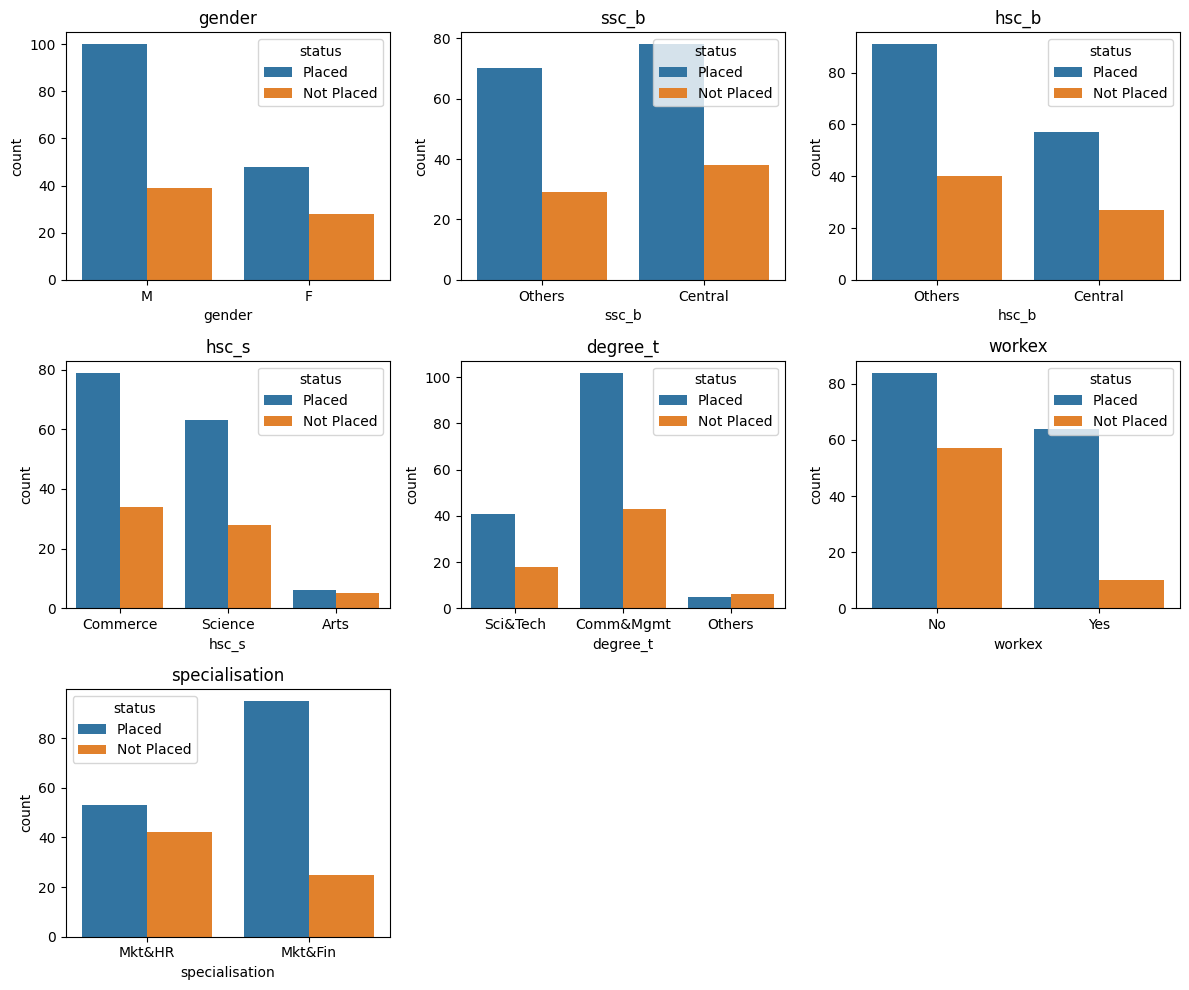

T-test for ssc_p: t-statistic=11.173294337111484, p-value=4.115201043884403e-23
T-test for hsc_p: t-statistic=8.230746477379519, p-value=1.849212756931434e-14
T-test for degree_p: t-statistic=7.982429212839097, p-value=8.807682138862608e-14
T-test for etest_p: t-statistic=1.8781977946559039, p-value=0.061720381110174166
T-test for mba_p: t-statistic=1.1259706009659818, p-value=0.26144500197748627
Chi-square test for gender: chi2-statistic=1.3817539668505108, p-value=0.23980260881037566
Chi-square test for ssc_b: chi2-statistic=0.15933127499487468, p-value=0.6897729431530739
Chi-square test for hsc_b: chi2-statistic=0.009517458006762429, p-value=0.9222837052885
Chi-square test for hsc_s: chi2-statistic=1.114745132708414, p-value=0.5727118511343621
Chi-square test for degree_t: chi2-statistic=2.9690428771222925, p-value=0.22661076190356658
Chi-square test for workex: chi2-statistic=15.154425347637423, p-value=9.906584720516494e-05
Chi-square test for specialisation: chi2-statistic=12.440

In [23]:
# Data Exploration and Visualization
# Distributions of numerical features
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Relationship between categorical features and placement status
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='status', data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Statistical Analysis
# t-tests for numerical features
placed = df[df['status'] == 'Placed']
not_placed = df[df['status'] == 'Not Placed']
for feature in numerical_features:
    t_stat, p_value = ttest_ind(placed[feature], not_placed[feature])
    print(f"T-test for {feature}: t-statistic={t_stat}, p-value={p_value}")

# Chi-square tests for categorical features
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['status'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}: chi2-statistic={chi2_stat}, p-value={p_value}")


In [24]:

features = ['ssc_p','hsc_p','hsc_s', 'degree_p', 'degree_t', 'workex', 'specialisation']
target = 'status'

X = df[features]
y = df[target]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
print(X_train)

     ssc_p  hsc_p     hsc_s  degree_p   degree_t workex specialisation
120  58.00   40.0   Science      59.0  Comm&Mgmt     No         Mkt&HR
29   62.00   67.0  Commerce      58.0  Comm&Mgmt     No        Mkt&Fin
19   60.00   67.0      Arts      70.0  Comm&Mgmt    Yes        Mkt&Fin
69   73.00   73.0   Science      66.0   Sci&Tech    Yes        Mkt&Fin
97   70.50   62.5  Commerce      61.0  Comm&Mgmt     No        Mkt&Fin
..     ...    ...       ...       ...        ...    ...            ...
106  61.08   50.0   Science      54.0   Sci&Tech     No        Mkt&Fin
14   62.00   47.0  Commerce      50.0  Comm&Mgmt     No         Mkt&HR
92   60.23   69.0   Science      66.0  Comm&Mgmt     No        Mkt&Fin
179  77.80   64.0   Science      64.2   Sci&Tech     No         Mkt&HR
102  77.00   61.0  Commerce      68.0  Comm&Mgmt    Yes        Mkt&Fin

[161 rows x 7 columns]


In [27]:
columns_with_nan = X_train.columns[X_train.isnull().any()]
print(columns_with_nan)

Index([], dtype='object')


In [28]:
numeric_features = ['ssc_p', 'hsc_p', 'degree_p']
categorical_features = ['hsc_s', 'degree_t', 'workex', 'specialisation']

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', SimpleImputer(strategy='mean'), numeric_features),
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
print(X_train_transformed)

[[58.   40.   59.   ...  0.    0.    1.  ]
 [62.   67.   58.   ...  0.    1.    0.  ]
 [60.   67.   70.   ...  1.    1.    0.  ]
 ...
 [60.23 69.   66.   ...  0.    1.    0.  ]
 [77.8  64.   64.2  ...  0.    0.    1.  ]
 [77.   61.   68.   ...  1.    1.    0.  ]]


Random Forest

In [31]:
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7962962962962963
Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.64      0.50      0.56        14
      Placed       0.84      0.90      0.87        40

    accuracy                           0.80        54
   macro avg       0.74      0.70      0.71        54
weighted avg       0.79      0.80      0.79        54



In [32]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

Multi-Layer Perceptron

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [250, 500, 1000, 10000, 100000],
}

mlp_model = MLPClassifier(random_state=42)

grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=10, scoring='accuracy', verbose=1)

grid_search_mlp.fit(X_train_transformed, y_train)

best_params_mlp = grid_search_mlp.best_params_
print("Best Parameters for MLPClassifier:", best_params_mlp)

best_mlp_model = MLPClassifier(random_state=42, **best_params_mlp)
best_mlp_model.fit(X_train_transformed, y_train)

y_pred_mlp = best_mlp_model.predict(X_test_transformed)

print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))



Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Parameters for MLPClassifier: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 10000}
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.73      0.57      0.64        14
      Placed       0.86      0.93      0.89        40

    accuracy                           0.83        54
   macro avg       0.79      0.75      0.77        54
weighted avg       0.83      0.83      0.83        54



Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

categorical_features = ['hsc_s', 'degree_t', 'workex', 'specialisation']

numeric_features = [col for col in X.columns if col not in categorical_features]

numeric_transformer = StandardScaler()
X_train_numeric = numeric_transformer.fit_transform(X_train[numeric_features])
X_test_numeric = numeric_transformer.transform(X_test[numeric_features])

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_categorical = categorical_transformer.fit_transform(X_train[categorical_features])
X_test_categorical = categorical_transformer.transform(X_test[categorical_features])

X_train_transformed = pd.concat([pd.DataFrame(X_train_numeric), pd.DataFrame(X_train_categorical)], axis=1)
X_test_transformed = pd.concat([pd.DataFrame(X_test_numeric), pd.DataFrame(X_test_categorical)], axis=1)

lr_model = LogisticRegression(random_state=42)

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=10, scoring='accuracy')

grid_search_lr.fit(X_train_transformed, y_train)

best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)

X_test_transformed = pd.concat([pd.DataFrame(X_test_numeric), pd.DataFrame(categorical_transformer.transform(X_test[categorical_features]))], axis=1)
y_pred_lr = grid_search_lr.predict(X_test_transformed)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.7962962962962963
Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.67      0.43      0.52        14
      Placed       0.82      0.93      0.87        40

    accuracy                           0.80        54
   macro avg       0.74      0.68      0.70        54
weighted avg       0.78      0.80      0.78        54



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

Research Question 3

Statistical tests for gender bias across fields

In [39]:
import scipy.stats as stats

numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Chi-square Test for Gender and Categorical Variables
print("Chi-square Test for Gender and Categorical Variables:")
for feature in categorical_features:
    contingency_table = pd.crosstab(df['gender'], df[feature])
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}: chi2-statistic={chi2_stat}, p-value={p_value}")

# T-test for Gender and Numerical Variables
print("\nT-test for Gender and Numerical Variables:")
for feature in numerical_features:
    male_data = df[df['gender'] == 'M'][feature]
    female_data = df[df['gender'] == 'F'][feature]
    t_stat, p_value = stats.ttest_ind(male_data, female_data)
    print(f"T-test for {feature}: t-statistic={t_stat}, p-value={p_value}")


Chi-square Test for Gender and Categorical Variables:
Chi-square test for gender: chi2-statistic=210.6465538063481, p-value=9.926750365615194e-48
Chi-square test for ssc_b: chi2-statistic=0.020100927589886457, p-value=0.887255567256032
Chi-square test for hsc_b: chi2-statistic=0.6736185443254182, p-value=0.4117928553478154
Chi-square test for hsc_s: chi2-statistic=1.9997559814872248, p-value=0.3679243286067856
Chi-square test for degree_t: chi2-statistic=2.9681747737976107, p-value=0.22670914403139364
Chi-square test for workex: chi2-statistic=1.2065815742732835, p-value=0.2720101906282858
Chi-square test for specialisation: chi2-statistic=1.9964846163235603, p-value=0.15766450402247145

T-test for Gender and Numerical Variables:
T-test for ssc_p: t-statistic=-1.0089663028243598, p-value=0.31413559337884356
T-test for hsc_p: t-statistic=-0.3114289866299036, p-value=0.7557791168083972
T-test for degree_p: t-statistic=-2.5668139101863066, p-value=0.01094938386489798
T-test for etest_p: t